# Linear Models

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Linear models for regression

`ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b`

`ŷ = w[0] * x[0] + b`

w[0]: 0.393906  b: -0.031804


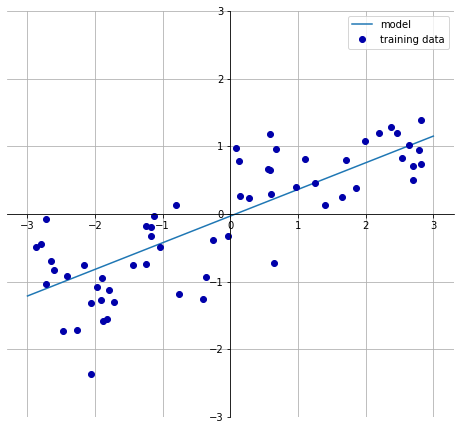

In [2]:
from helpers.plot_linear_regression_wave import plot_linear_regression_wave

plot_linear_regression_wave()
plt.show()

### Linear regression

<img src="https://cdn-images-1.medium.com/max/800/1*fX95txC9xSwSPeP6ch2nmg.gif">

<img alt="Visualizing RSS" src="https://s3.amazonaws.com/dq-content/235/visualizing_rss.svg">

In [3]:
import helpers

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = helpers.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

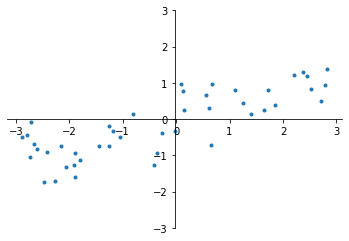

In [4]:
plt.plot(X_train,y_train, ".")
ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.set_ylim(-3, 3)

plt.show()

In [5]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.03180434302675973


In [6]:
print(f"Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Test set score: {lr.score(X_test, y_test):.2f}")

Training set score: 0.67
Test set score: 0.66


In [7]:
from helpers.datasets import load_extended_boston

X, y = load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [8]:
print(f"Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Test set score: {lr.score(X_test, y_test):.2f}")

Training set score: 0.95
Test set score: 0.61


### Ridge regression

In [9]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)
print(f"Training set score: {ridge.score(X_train, y_train):.2f}")
print(f"Test set score: {ridge.score(X_test, y_test):.2f}")

Training set score: 0.89
Test set score: 0.75


In [10]:
traning_scores = {}
testing_scores = {}

alphas = [0.001, 0.01, 0.1, 1, 5, 10, 20]

for alpha in alphas:
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    traning_scores[alpha] = ridge.score(X_train, y_train)
    testing_scores[alpha] = ridge.score(X_test, y_test)

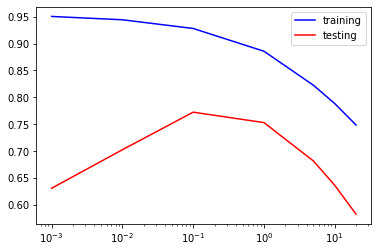

In [11]:
plt.plot(traning_scores.keys(), traning_scores.values(), c="blue", label="training")
plt.plot(testing_scores.keys(), testing_scores.values(), c="red", label="testing")
plt.legend()
plt.xscale('log')
plt.show()

In [12]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print(f"Training set score: {ridge10.score(X_train, y_train):.2f}")
print(f"Test set score: {ridge10.score(X_test, y_test):.2f}")

Training set score: 0.79
Test set score: 0.64


In [13]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print(f"Training set score: {ridge01.score(X_train, y_train):.2f}")
print(f"Test set score: {ridge01.score(X_test, y_test):.2f}")

Training set score: 0.93
Test set score: 0.77


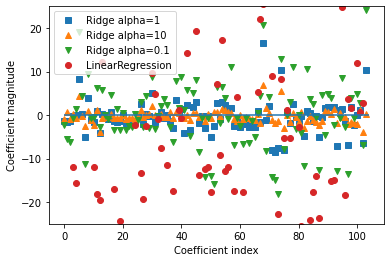

In [14]:
ridge = Ridge().fit(X_train, y_train)
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()

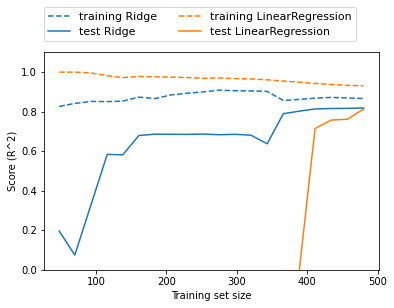

In [15]:
from helpers.plot_ridge_n_samples import plot_ridge_n_samples

plot_ridge_n_samples()
plt.show()

### Lasso

In [16]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

print(f"Training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Test set score: {lasso.score(X_test, y_test):.2f}")
print(f"Number of features used: {np.sum(lasso.coef_ != 0)}")

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [17]:
traning_scores = {}
testing_scores = {}

alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10]

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=100000).fit(X_train, y_train)
    traning_scores[alpha] = lasso.score(X_train, y_train)
    testing_scores[alpha] = lasso.score(X_test, y_test)

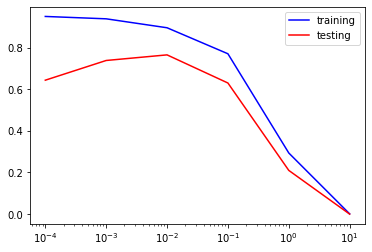

In [18]:
plt.plot(traning_scores.keys(), traning_scores.values(), c="blue", label="training")
plt.plot(testing_scores.keys(), testing_scores.values(), c="red", label="testing")
plt.legend()
plt.xscale('log')
plt.show()

In [19]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print(f"Training set score: {lasso001.score(X_train, y_train):.2f}")
print(f"Test set score: {lasso001.score(X_test, y_test):.2f}")
print(f"Number of features used: {np.sum(lasso001.coef_ != 0)}")

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [20]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print(f"Training set score: {lasso00001.score(X_train, y_train):.2f}")
print(f"Test set score: {lasso00001.score(X_test, y_test):.2f}")
print(f"Number of features used: {np.sum(lasso00001.coef_ != 0)}")

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


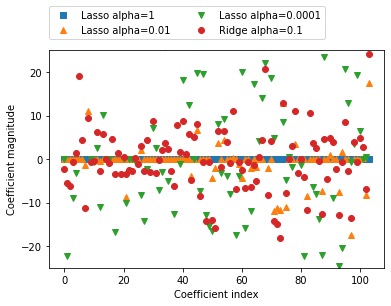

In [21]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")

plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.show()

In [22]:
from sklearn.linear_model import ElasticNet

e_net = ElasticNet(alpha=0.001, l1_ratio=0.5, max_iter=10000).fit(X_train, y_train)

print(f"Training set score: {e_net.score(X_train, y_train):.2f}")
print(f"Test set score: {e_net.score(X_test, y_test):.2f}")

Training set score: 0.92
Test set score: 0.78


## Linear models for binary classification

`ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0`

- logistic regression, implemented in `linear_model.LogisticRegression`
- linear support vector machines (linear SVMs), implemented in `svm.LinearSVC` (SVC stands for support vector classifier)

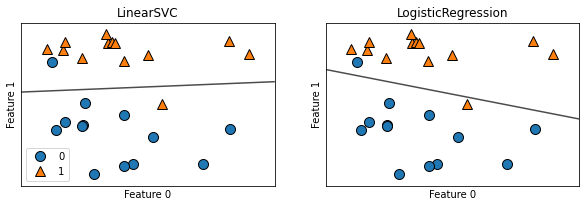

In [23]:
from helpers.plot_2d_separator import plot_2d_separator
from helpers.plot_helpers import discrete_scatter

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = helpers.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=10000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    plot_2d_separator(clf, X, fill=False, eps=0.5,ax=ax, alpha=.7)
    discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    
axes[0].legend()
plt.show()

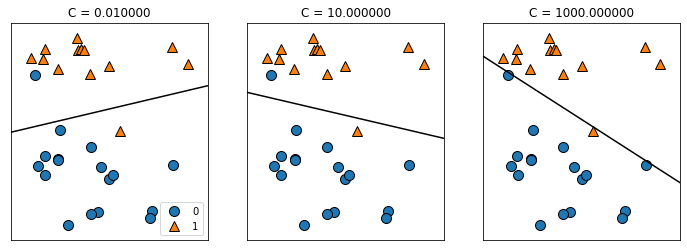

In [24]:
from helpers.plot_linear_svc_regularization import plot_linear_svc_regularization

plot_linear_svc_regularization()

In [25]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression(max_iter=10000).fit(X_train, y_train)

print(f"Training set score: {logreg.score(X_train, y_train):.3f}")
print(f"Test set score: {logreg.score(X_test, y_test):.3f}")

Training set score: 0.958
Test set score: 0.958


In [26]:
logreg100 = LogisticRegression(max_iter=10000, C=100).fit(X_train, y_train)

print(f"Training set score: {logreg100.score(X_train, y_train):.3f}")
print(f"Test set score: {logreg100.score(X_test, y_test):.3f}")

Training set score: 0.984
Test set score: 0.965


In [27]:
logreg001 = LogisticRegression(max_iter=10000, C=0.01).fit(X_train, y_train)

print(f"Training set score: {logreg001.score(X_train, y_train):.3f}")
print(f"Test set score: {logreg001.score(X_test, y_test):.3f}")

Training set score: 0.953
Test set score: 0.951


Parameter C = 0.01: Ex. time: 0.21396279335021973
Parameter C = 1: Ex. time: 1.0679452419281006
Parameter C = 10: Ex. time: 0.34356117248535156
Parameter C = 100: Ex. time: 2.1522486209869385
Parameter C = 500: Ex. time: 2.451167345046997
Parameter C = 1000: Ex. time: 1.7598252296447754
Parameter C = 5000: Ex. time: 2.8141098022460938


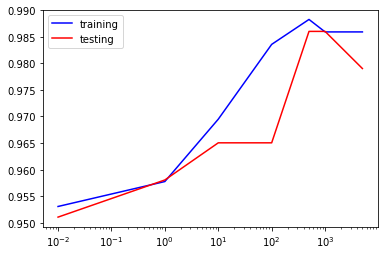

In [29]:
import time

traning_scores = {}
testing_scores = {}

c_values = [0.01, 1, 10, 100, 500, 1000, 5000]

for c in c_values:
    start_time = time.time()
    logreg_diff = LogisticRegression(C=c, max_iter=100000).fit(X_train, y_train)
    traning_scores[c] = logreg_diff.score(X_train, y_train)
    testing_scores[c] = logreg_diff.score(X_test, y_test)
    print(f"Parameter C = {c}: Ex. time: {time.time() - start_time}")
    
plt.plot(traning_scores.keys(), traning_scores.values(), c="blue", label="training")
plt.plot(testing_scores.keys(), testing_scores.values(), c="red", label="testing")
plt.legend()
plt.xscale('log')
plt.show()

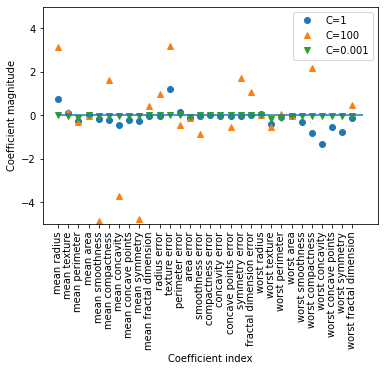

In [30]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression(max_iter=10000).fit(X_train, y_train)
logreg100 = LogisticRegression(max_iter=10000, C=100).fit(X_train, y_train)
logreg001 = LogisticRegression(max_iter=10000, C=0.01).fit(X_train, y_train)

plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.show()

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


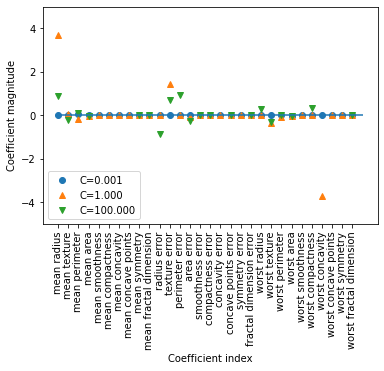

In [34]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver="liblinear", max_iter=10000).fit(X_train, y_train)
    print(f"Training accuracy of l1 logreg with C={C:.3f}: {lr_l1.score(X_train, y_train):.2f}")
    print(f"Test accuracy of l1 logreg with C={C:.3f}: {lr_l1.score(X_test, y_test):.2f}")
    plt.plot(lr_l1.coef_.T, marker, label=f"C={C:.3f}")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show()

## Linear models for multiclass classification



`w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b`

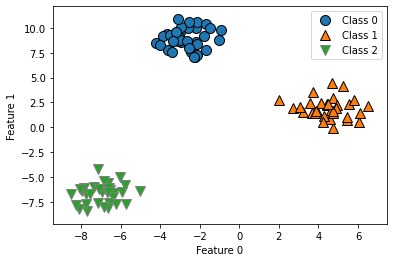

In [35]:
from sklearn.datasets import make_blobs
from helpers.tools import discrete_scatter

X, y = make_blobs(random_state=42)

discrete_scatter(X[:, 0], X[:, 1], y)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])
plt.show()

In [36]:
linear_svm = LinearSVC().fit(X, y)

print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


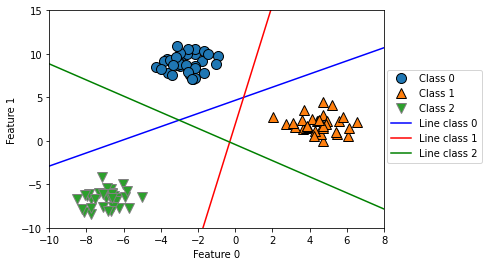

In [37]:
discrete_scatter(X[:, 0], X[:, 1], y)

line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1','Line class 2'], loc=(1.01, 0.3))
plt.show()

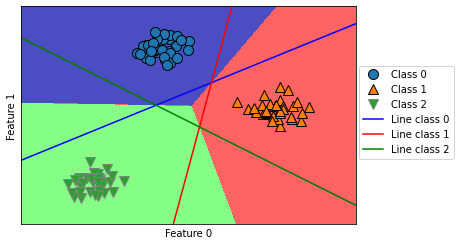

In [38]:
from helpers.plot_2d_separator import plot_2d_classification

plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
discrete_scatter(X[:, 0], X[:, 1], y)

line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

## Strengths, weaknesses, and parameters

**Parameters**:
- The main parameter of linear models is the regularization parameter:
    - called alpha in the regression models
    - called C in LinearSVC and LogisticRegression
- Large values for alpha or small values for C mean simple models.
- Nastavitem parametrov je pomembna
- Parametre iščemo po logaritmični skali

**Strengths**:
- Linear models are very fast to train, and also fast to predict.
- They scale to very large datasets and work well with sparse data
- easy to understand how a prediction is made
- perform well when the number of features is large compared to the number of samples

**Weaknesses**:
- pri manj značilkah se boljše odrežejo kakšni drugi modeli